In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error,mean_absolute_error
pd.set_option('display.max_columns', None)

##  i  build an ARIMA model to forecast future values in a time series based on past trends and patterns.

In [168]:
main_df = pd.read_csv("../data/raw/the_merged_df.csv")

In [169]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   incident_id              60000 non-null  int64  
 1   datetime                 60000 non-null  object 
 2   initial_type             60000 non-null  object 
 3   initial_severity         60000 non-null  int64  
 4   final_type               60000 non-null  object 
 5   final_severity           60000 non-null  int64  
 6   assignment_time          59223 non-null  object 
 7   valid_dispatch_response  60000 non-null  object 
 8   dispatch_response_sec    60000 non-null  int64  
 9   activation_time          59126 non-null  object 
 10  on_scene_time            57362 non-null  object 
 11  valid_incident_response  60000 non-null  object 
 12  incident_response_sec    57358 non-null  float64
 13  travel_time_sec          57362 non-null  float64
 14  to_hospital_time      

In [170]:
main_df.columns

Index(['incident_id', 'datetime', 'initial_type', 'initial_severity',
       'final_type', 'final_severity', 'assignment_time',
       'valid_dispatch_response', 'dispatch_response_sec', 'activation_time',
       'on_scene_time', 'valid_incident_response', 'incident_response_sec',
       'travel_time_sec', 'to_hospital_time', 'hospital_arrival_time',
       'close_time', 'held', 'disposition', 'borough', 'dispatch_area',
       'zipcode', 'precinct', 'council_district', 'community_district',
       'school_district', 'congressional_district', 'reopened',
       'special_events', 'standby', 'transferred', 'year', 'month', 'day',
       'week_day', 'hour', 'datetime_hour', 'datetime_weather', 'temperture',
       'precipitation', 'windspeed', 'weathercode', 'is_weekend',
       'is_rush_hour', 'time_of_day', 'season', 'is_holiday'],
      dtype='object')

In [171]:

drop_cols = ['travel_time_sec', 'dispatch_response_sec', 'close_time', 'hospital_arrival_time', 'to_hospital_time', 'on_scene_time', 'activation_time', 'assignment_time', 'final_severity', 'final_type']
main_df = main_df.drop(columns=drop_cols)
main_drop_cols = ['incident_response_sec','travel_time_sec', 'dispatch_response_sec', 'close_time', 'hospital_arrival_time', 'to_hospital_time', 'on_scene_time', 'activation_time', 'assignment_time', 'final_severity', 'final_type'] 

In [172]:
main_df.head()

,incident_id,datetime,initial_type,initial_severity,valid_dispatch_response,valid_incident_response,incident_response_sec,held,disposition,borough,dispatch_area,zipcode,precinct,council_district,community_district,school_district,congressional_district,reopened,special_events,standby,transferred,year,month,day,week_day,hour,datetime_hour,datetime_weather,temperture,precipitation,windspeed,weathercode,is_weekend,is_rush_hour,time_of_day,season,is_holiday
0,230010001,2023-01-01 00:00:02,UNKNOW,4,Y,Y,1887.0,N,90,MANHATTAN,M5,10128,19,4,108,2,12,Y,N,N,N,2023,1,1,Sunday,0,2023-01-01 00:00:00,2023-01-01 00:00:00,48.0,0.4,11.3,51,1,0,night,winter,0
1,230010002,2023-01-01 00:00:16,RESPFC,4,Y,Y,7365.0,Y,96,BROOKLYN,K5,11221,79,36,303,16,8,N,N,N,N,2023,1,1,Sunday,0,2023-01-01 00:00:00,2023-01-01 00:00:00,48.0,0.4,11.3,51,1,0,night,winter,0
2,230010003,2023-01-01 00:00:30,DIFFFC,2,Y,Y,479.0,N,82,BRONX,B5,10463,52,14,207,10,13,N,N,N,N,2023,1,1,Sunday,0,2023-01-01 00:00:00,2023-01-01 00:00:00,48.0,0.4,11.3,51,1,0,night,winter,0
3,230010004,2023-01-01 00:01:35,INJURY,5,Y,Y,3725.0,N,82,MANHATTAN,M3,10018,14,3,104,2,10,N,N,N,N,2023,1,1,Sunday,0,2023-01-01 00:00:00,2023-01-01 00:00:00,48.0,0.4,11.3,51,1,0,night,winter,0
4,230010007,2023-01-01 00:01:55,DRUG,4,Y,Y,2108.0,Y,93,MANHATTAN,M9,10034,34,10,112,6,13,N,N,N,N,2023,1,1,Sunday,0,2023-01-01 00:00:00,2023-01-01 00:00:00,48.0,0.4,11.3,51,1,0,night,winter,0


In [173]:
main_df.columns

Index(['incident_id', 'datetime', 'initial_type', 'initial_severity',
       'valid_dispatch_response', 'valid_incident_response',
       'incident_response_sec', 'held', 'disposition', 'borough',
       'dispatch_area', 'zipcode', 'precinct', 'council_district',
       'community_district', 'school_district', 'congressional_district',
       'reopened', 'special_events', 'standby', 'transferred', 'year', 'month',
       'day', 'week_day', 'hour', 'datetime_hour', 'datetime_weather',
       'temperture', 'precipitation', 'windspeed', 'weathercode', 'is_weekend',
       'is_rush_hour', 'time_of_day', 'season', 'is_holiday'],
      dtype='object')

In [174]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   incident_id              60000 non-null  int64  
 1   datetime                 60000 non-null  object 
 2   initial_type             60000 non-null  object 
 3   initial_severity         60000 non-null  int64  
 4   valid_dispatch_response  60000 non-null  object 
 5   valid_incident_response  60000 non-null  object 
 6   incident_response_sec    57358 non-null  float64
 7   held                     60000 non-null  object 
 8   disposition              60000 non-null  object 
 9   borough                  60000 non-null  object 
 10  dispatch_area            60000 non-null  object 
 11  zipcode                  60000 non-null  int64  
 12  precinct                 60000 non-null  int64  
 13  council_district         60000 non-null  int64  
 14  community_district    

In [175]:
main_df.isna().sum().sum()

np.int64(2642)

In [176]:
main_df.columns

Index(['incident_id', 'datetime', 'initial_type', 'initial_severity',
       'valid_dispatch_response', 'valid_incident_response',
       'incident_response_sec', 'held', 'disposition', 'borough',
       'dispatch_area', 'zipcode', 'precinct', 'council_district',
       'community_district', 'school_district', 'congressional_district',
       'reopened', 'special_events', 'standby', 'transferred', 'year', 'month',
       'day', 'week_day', 'hour', 'datetime_hour', 'datetime_weather',
       'temperture', 'precipitation', 'windspeed', 'weathercode', 'is_weekend',
       'is_rush_hour', 'time_of_day', 'season', 'is_holiday'],
      dtype='object')

In [177]:
time_df = main_df[['datetime', 'incident_response_sec']].copy()

In [178]:
time_df 

,datetime,incident_response_sec
0,2023-01-01 00:00:02,1887.0
1,2023-01-01 00:00:16,7365.0
2,2023-01-01 00:00:30,479.0
3,2023-01-01 00:01:35,3725.0
4,2023-01-01 00:01:55,2108.0
...,...,...
59995,2023-01-14 18:13:18,285.0
59996,2023-01-14 18:13:31,537.0
59997,2023-01-14 18:13:54,636.0
59998,2023-01-14 18:13:59,158.0


In [179]:
time_df.isna().sum()

datetime                    0
incident_response_sec    2642
dtype: int64

In [180]:
time_df['incident_response_sec'].describe()

count    57358.000000
mean       727.916559
std       1048.088971
min          0.000000
25%        347.000000
50%        505.000000
75%        756.000000
max      32022.000000
Name: incident_response_sec, dtype: float64

In [181]:
time_df.loc[time_df['incident_response_sec'] .isna()]

,datetime,incident_response_sec
6,2023-01-01 00:02:36,NaN
13,2023-01-01 00:05:59,NaN
16,2023-01-01 00:06:41,NaN
29,2023-01-01 00:12:15,NaN
37,2023-01-01 00:14:38,NaN
...,...,...
59905,2023-01-14 17:44:42,NaN
59908,2023-01-14 17:45:22,NaN
59964,2023-01-14 18:04:18,NaN
59967,2023-01-14 18:05:43,NaN


In [182]:
time_df['datetime'] = pd.to_datetime(time_df['datetime'])

In [183]:
time_df['datetime']

0       2023-01-01 00:00:02
1       2023-01-01 00:00:16
2       2023-01-01 00:00:30
3       2023-01-01 00:01:35
4       2023-01-01 00:01:55
                ...        
59995   2023-01-14 18:13:18
59996   2023-01-14 18:13:31
59997   2023-01-14 18:13:54
59998   2023-01-14 18:13:59
59999   2023-01-14 18:14:35
Name: datetime, Length: 60000, dtype: datetime64[ns]

In [184]:
time_df['datetime'] = time_df['datetime'].dt.floor('H')

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_88004/2073466220.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_df['datetime'] = time_df['datetime'].dt.floor('H')


In [185]:
time_df

,datetime,incident_response_sec
0,2023-01-01 00:00:00,1887.0
1,2023-01-01 00:00:00,7365.0
2,2023-01-01 00:00:00,479.0
3,2023-01-01 00:00:00,3725.0
4,2023-01-01 00:00:00,2108.0
...,...,...
59995,2023-01-14 18:00:00,285.0
59996,2023-01-14 18:00:00,537.0
59997,2023-01-14 18:00:00,636.0
59998,2023-01-14 18:00:00,158.0


In [186]:
time_df.isna().sum()

datetime                    0
incident_response_sec    2642
dtype: int64

In [187]:
time_df.loc[time_df['incident_response_sec'].isna()]

,datetime,incident_response_sec
6,2023-01-01 00:00:00,NaN
13,2023-01-01 00:00:00,NaN
16,2023-01-01 00:00:00,NaN
29,2023-01-01 00:00:00,NaN
37,2023-01-01 00:00:00,NaN
...,...,...
59905,2023-01-14 17:00:00,NaN
59908,2023-01-14 17:00:00,NaN
59964,2023-01-14 18:00:00,NaN
59967,2023-01-14 18:00:00,NaN


In [188]:
time_df.loc[(time_df['datetime'] == '2023-01-01 00:00:00').value_counts()]

,datetime,incident_response_sec
59770,2023-01-14 17:00:00,691.0
230,2023-01-01 00:00:00,NaN


In [189]:
time_df.loc[time_df['incident_response_sec'].isna().sum()]

datetime                 2023-01-01 14:00:00
incident_response_sec                  708.0
Name: 2642, dtype: object

In [190]:
time_df.groupby('datetime')['incident_response_sec'] \
       .apply(lambda x: x.isna().sum())

datetime
2006-01-01 16:00:00    1
2006-01-02 01:00:00    0
2006-01-02 12:00:00    0
2006-01-02 15:00:00    1
2006-01-02 19:00:00    1
                      ..
2024-10-05 23:00:00    1
2024-10-06 00:00:00    1
2024-10-06 02:00:00    0
2024-10-06 03:00:00    0
2024-10-06 05:00:00    2
Name: incident_response_sec, Length: 550, dtype: int64

In [191]:
time_df.groupby('datetime')['incident_response_sec'].apply(lambda x: x.isna().sum())

datetime
2006-01-01 16:00:00    1
2006-01-02 01:00:00    0
2006-01-02 12:00:00    0
2006-01-02 15:00:00    1
2006-01-02 19:00:00    1
                      ..
2024-10-05 23:00:00    1
2024-10-06 00:00:00    1
2024-10-06 02:00:00    0
2024-10-06 03:00:00    0
2024-10-06 05:00:00    2
Name: incident_response_sec, Length: 550, dtype: int64

(array([12418., 13149., 13879., 14610., 15340., 16071., 16801., 17532.,
        18262., 18993., 19723., 20454.]),
 [Text(12418.0, 0, '2004'),
  Text(13149.0, 0, '2006'),
  Text(13879.0, 0, '2008'),
  Text(14610.0, 0, '2010'),
  Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018'),
  Text(18262.0, 0, '2020'),
  Text(18993.0, 0, '2022'),
  Text(19723.0, 0, '2024'),
  Text(20454.0, 0, '2026')])

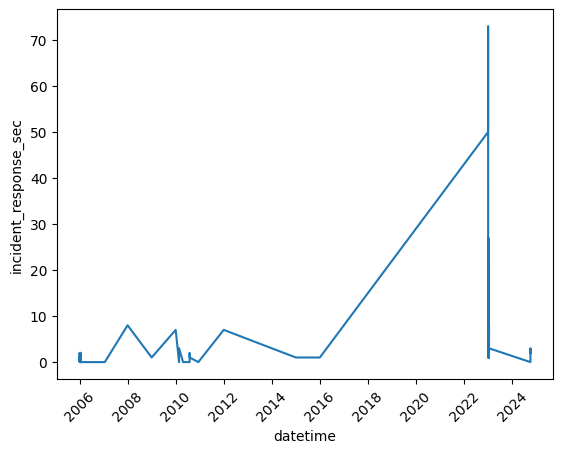

In [192]:
sns.lineplot(x='datetime', y='incident_response_sec', data=time_df.groupby('datetime')['incident_response_sec'].apply(lambda x: x.isna().sum()).reset_index())
plt.xticks(rotation=45)

In [193]:
time_df.groupby(time_df["datetime"].dt.year)['incident_response_sec'].apply(lambda x: x.isna().sum())

datetime
2006      86
2007       0
2008       8
2009       1
2010      13
2012       7
2015       1
2016       1
2023    2513
2024      12
Name: incident_response_sec, dtype: int64

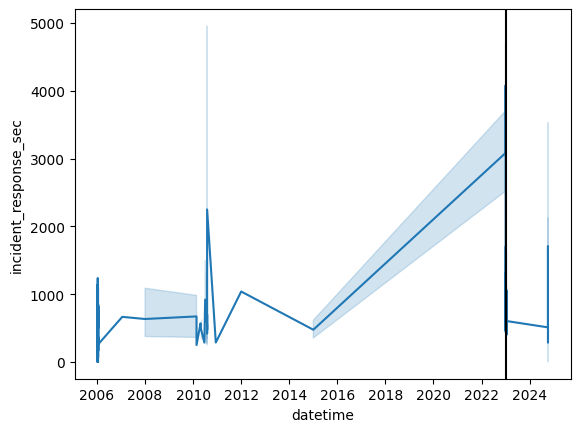

In [194]:
sns.lineplot(data=time_df,x='datetime',y='incident_response_sec')
plt.axvline(pd.to_datetime('2023-01-11'),color='Black')

In [195]:
time_df = time_df.sort_values("datetime")

train_df = time_df[time_df["datetime"] < "2023-01-11"].copy()
test_df  = time_df[time_df["datetime"] >= "2023-01-11"].copy()

In [196]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44354 entries, 2797 to 44242
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   datetime               44354 non-null  datetime64[ns]
 1   incident_response_sec  42269 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 MB


In [197]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15646 entries, 44434 to 57313
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   datetime               15646 non-null  datetime64[ns]
 1   incident_response_sec  15089 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 366.7 KB


<Axes: xlabel='datetime', ylabel='incident_response_sec'>

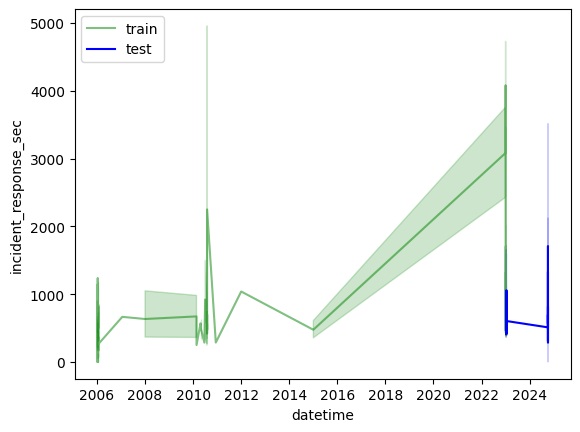

In [198]:
sns.lineplot(data=train_df, x='datetime', y='incident_response_sec', label='train', color='green',alpha=0.5)
sns.lineplot(data=test_df,  x='datetime',  y='incident_response_sec', label='test',  color='blue')

In [199]:
train_median = train_df['incident_response_sec'].median()

In [200]:
train_df['incident_response_sec'] = train_df['incident_response_sec'].fillna(train_median)
test_df['incident_response_sec'] = test_df['incident_response_sec'].fillna(train_median)


In [201]:
train_df.isna().sum()

datetime                 0
incident_response_sec    0
dtype: int64

In [202]:
test_df.isna().sum()

datetime                 0
incident_response_sec    0
dtype: int64

<Axes: xlabel='datetime', ylabel='incident_response_sec'>

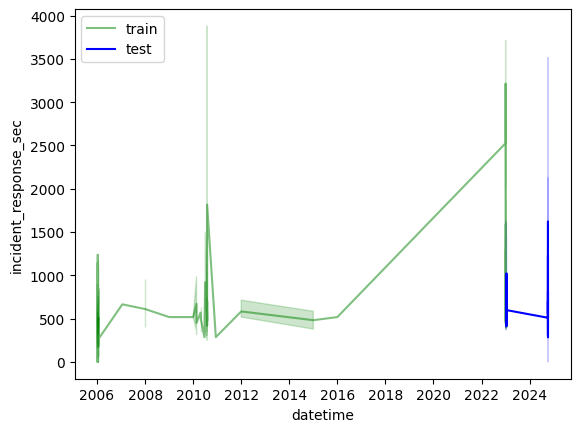

In [203]:
sns.lineplot(data=train_df, x='datetime', y='incident_response_sec', label='train', color='green',alpha=0.5)
sns.lineplot(data=test_df,  x='datetime',  y='incident_response_sec', label='test',  color='blue')

In [204]:
train_df.head()

,datetime,incident_response_sec
2797,2006-01-01 16:00:00,518.0
3997,2006-01-02 01:00:00,204.0
5022,2006-01-02 12:00:00,222.0
5431,2006-01-02 15:00:00,518.0
6077,2006-01-02 19:00:00,518.0


## Not stationary 
 Contains a trend
 Includes outliers log transformation needed 
Variance changes over time


In [205]:
train_log_df = train_df.copy()
test_log_df  = test_df.copy()

In [206]:
train_log_df['incident_response_sec'] = np.log(train_log_df['incident_response_sec'] + 1)
test_log_df['incident_response_sec'] = np.log(test_log_df['incident_response_sec'] + 1)

In [207]:
train_log_df.head()

,datetime,incident_response_sec
2797,2006-01-01 16:00:00,6.251904
3997,2006-01-02 01:00:00,5.323010
5022,2006-01-02 12:00:00,5.407172
5431,2006-01-02 15:00:00,6.251904
6077,2006-01-02 19:00:00,6.251904


In [208]:
test_log_df.head()

,datetime,incident_response_sec
44434,2023-01-11,6.142037
44435,2023-01-11,6.726233
44436,2023-01-11,5.549076
44437,2023-01-11,5.998937
44438,2023-01-11,6.169611


<Axes: xlabel='datetime', ylabel='incident_response_sec'>

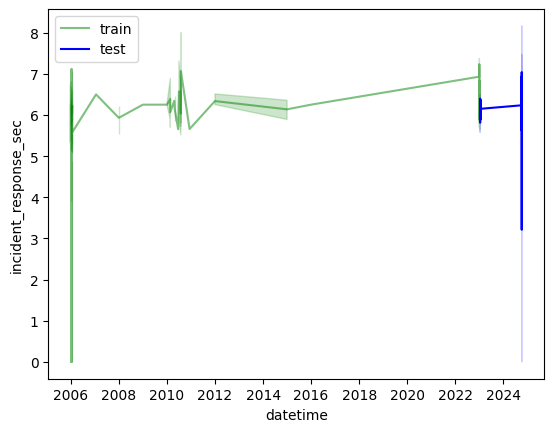

In [209]:
sns.lineplot(data=train_log_df, x='datetime', y='incident_response_sec', label='train', color='green',alpha=0.5)
sns.lineplot(data=test_log_df,  x='datetime',  y='incident_response_sec', label='test',  color='blue')

In [210]:
## Differencing
train_diff = train_log_df['incident_response_sec'].diff().dropna()
test_diff  = test_log_df['incident_response_sec'].diff().dropna()

In [211]:
train_diff.head()

3997   -0.928894
5022    0.084162
5431    0.844732
6077    0.000000
6246   -0.136012
Name: incident_response_sec, dtype: float64

In [212]:
train_diff.info()

<class 'pandas.core.series.Series'>
Index: 44353 entries, 3997 to 44242
Series name: incident_response_sec
Non-Null Count  Dtype  
--------------  -----  
44353 non-null  float64
dtypes: float64(1)
memory usage: 693.0 KB


In [213]:
train_diff.isna().sum()

np.int64(0)

In [214]:
test_diff.head()

44435    0.584196
44436   -1.177157
44437    0.449860
44438    0.170674
44441    0.271336
Name: incident_response_sec, dtype: float64

In [215]:
test_diff.info()

<class 'pandas.core.series.Series'>
Index: 15645 entries, 44435 to 57313
Series name: incident_response_sec
Non-Null Count  Dtype  
--------------  -----  
15645 non-null  float64
dtypes: float64(1)
memory usage: 244.5 KB


In [216]:
test_diff.isna().sum()

np.int64(0)

The 120-day rolling average indicates a strong and steady upward trend in sales

In [217]:
from statsmodels.graphics.tsaplots import plot_acf

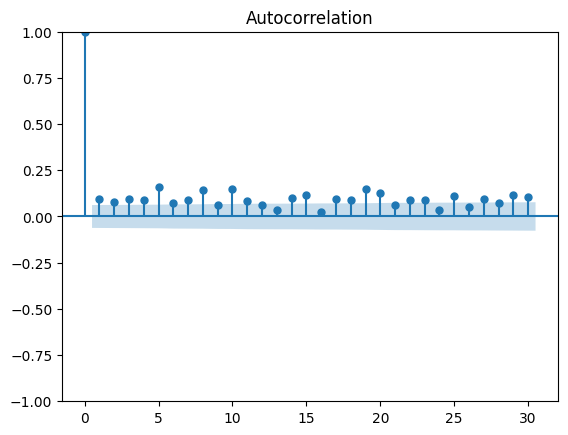

<Figure size 1400x300 with 0 Axes>

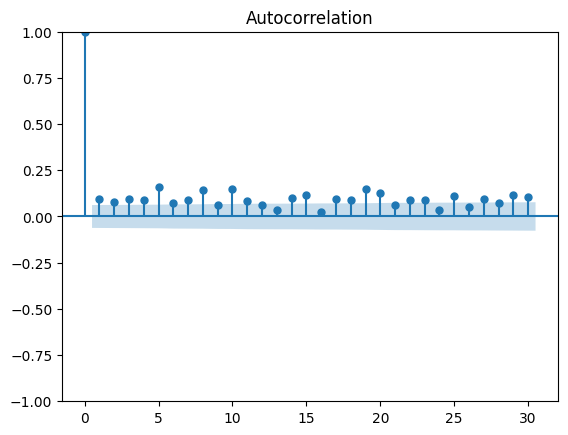

In [218]:
plt.figure(figsize=(14,3))
plot_acf(train_df['incident_response_sec'][:1000])

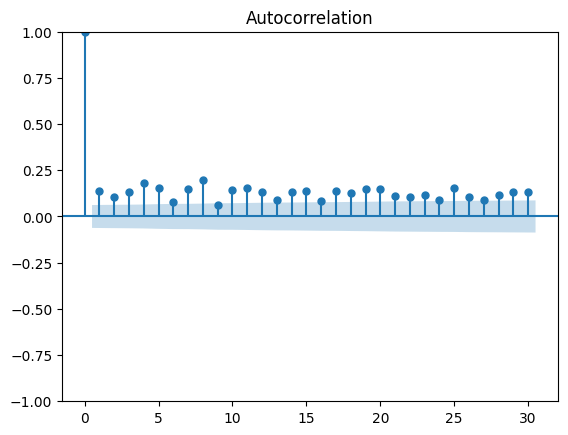

<Figure size 1400x300 with 0 Axes>

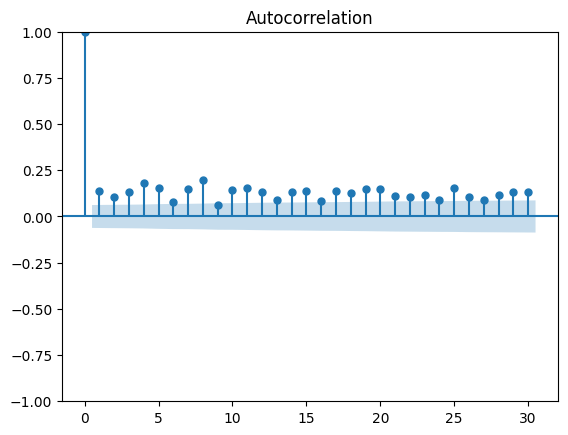

In [219]:
plt.figure(figsize=(14,3))
plot_acf(train_log_df['incident_response_sec'][:1000])

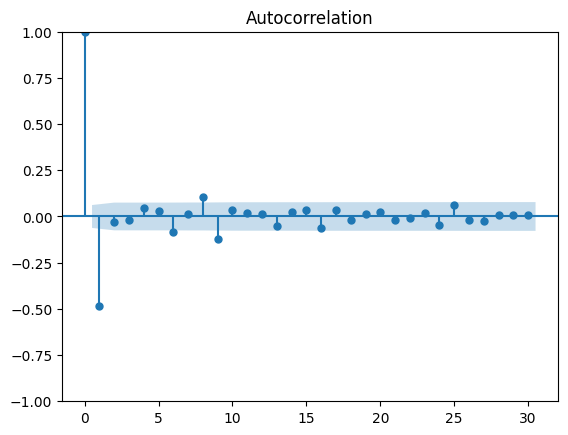

<Figure size 1400x300 with 0 Axes>

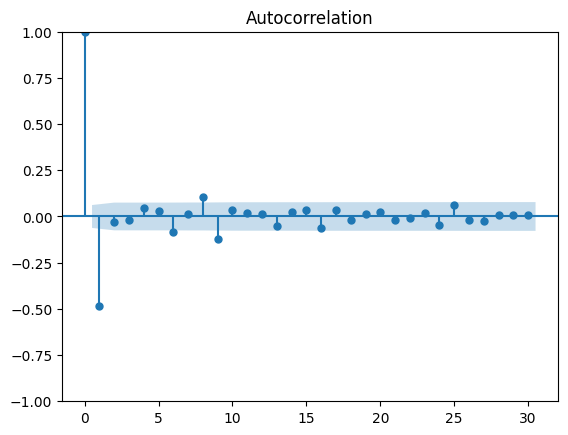

In [220]:
plt.figure(figsize=(14,3))
plot_acf(train_diff[:1000])

In [253]:
from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition ayrisma
decomposition = seasonal_decompose(train_df['incident_response_sec'],period=7)
# bu hafta da bir tekrar eden bir desen hafta icin 7 yaptim

In [254]:
plt.figure(figsize=(14,3))
sns.lineplot(x=train_df['datetime'][:1000],y=train_df['incident_response_sec'][:1000])
sns.lineplot(decomposition.trend[:1000])
sns.lineplot(decomposition.seasonal[:1000])
plt.axhline(train_df['incident_response_sec'][:1000].mean())
plt.grid()

KeyError: 'datetime'

<Figure size 1400x300 with 0 Axes>

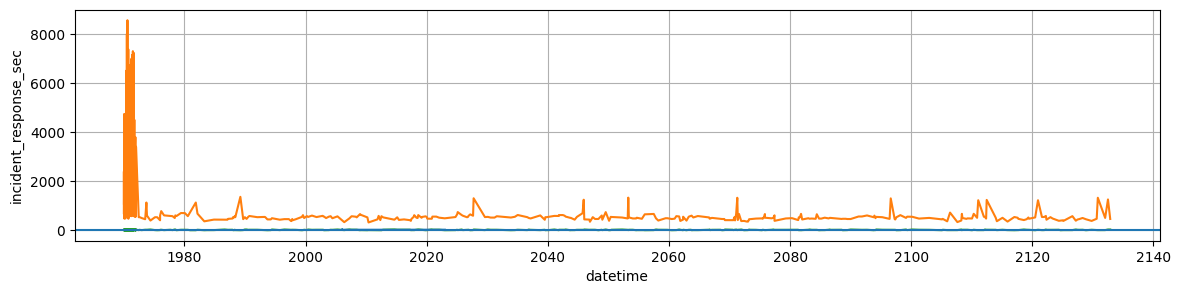

In [223]:
plt.figure(figsize=(14,3))
sns.lineplot(x=train_log_df.set_index('datetime')[:1000].index,y=train_log_df['incident_response_sec'][:1000])
sns.lineplot(decomposition.trend[:1000])
sns.lineplot(decomposition.seasonal[:1000])
plt.axhline(train_log_df.set_index('datetime')['incident_response_sec'][:1000].mean())
plt.grid()

In [224]:
##Yeşil = normal günlük ritim --> green =normal dailiy routine  Her hafta tekrar eden bir satış alışkanlığı YOK.
##Turuncu = uzun vadeli değişim --> orange=long term change Günlük küçük oynamaları boşver, asıl gidişat ne?
##Mavi çukur = hata --> blue=error or something happen in this day “Gerçekte satışlar zamanla nasıl değişmiş?'''


<Axes: ylabel='incident_response_sec'>

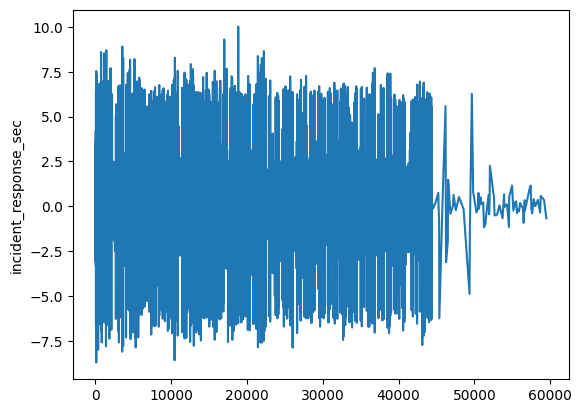

In [225]:
sns.lineplot(train_diff)

In [226]:
time_df['incident_response_sec_roll'] = time_df['incident_response_sec'].rolling(120).mean()

<Axes: >

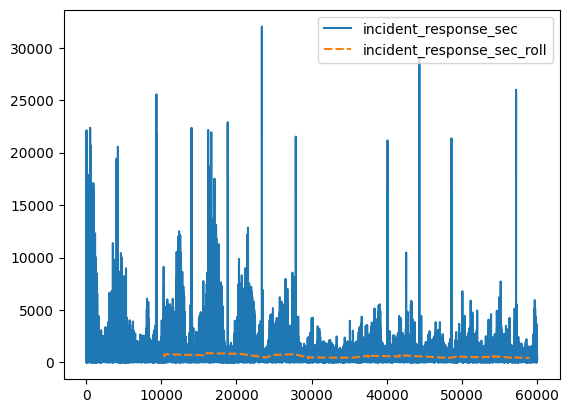

In [227]:
sns.lineplot(time_df)

In [228]:
train_df = train_df.set_index('datetime')
test_df = test_df.set_index('datetime')

In [229]:
train_df.head()

,incident_response_sec
datetime,
2006-01-01 16:00:00,518.0
2006-01-02 01:00:00,204.0
2006-01-02 12:00:00,222.0
2006-01-02 15:00:00,518.0
2006-01-02 19:00:00,518.0


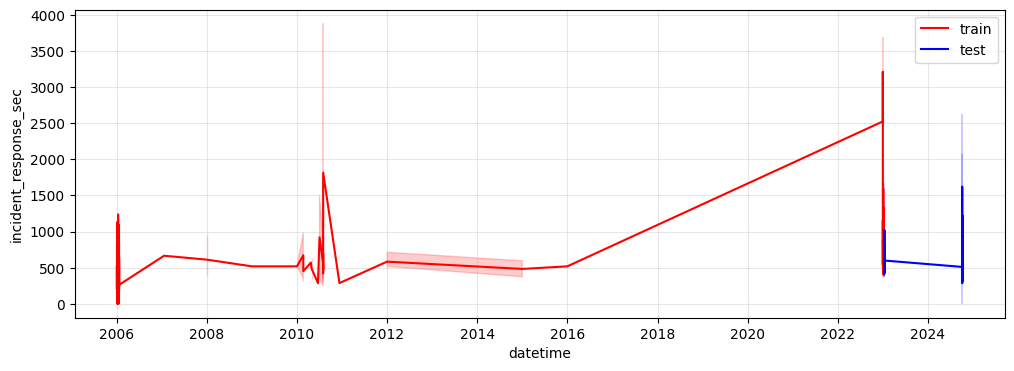

In [230]:
plt.figure(figsize=(12,4))

sns.lineplot(data=train_df, x=train_df.index, y='incident_response_sec', label='train', color='red')
sns.lineplot(data=test_df,  x=test_df.index,  y='incident_response_sec', label='test',  color='blue')

plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [231]:
from statsmodels.tsa.arima.model import ARIMA

In [232]:
model = ARIMA(endog=train_df,order=(2,1,2))

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
#model = ARIMA(endog=training_set,order=(2,  # p the number of autoregression terms  p = kaç gün geriye bakıyorum
 #                                        1, # d the number of differencing terms d, “kaçtayım?” yerine “ne kadar değiştim?” diye sordurur.
  #                                       2)) # q the number of moving average terms)) q DÜN NE KADAR SAÇMALADIM


In [233]:
results = model.fit()

In [234]:
arima_pred = results.get_forecast(steps=len(test_df)).predicted_mean

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


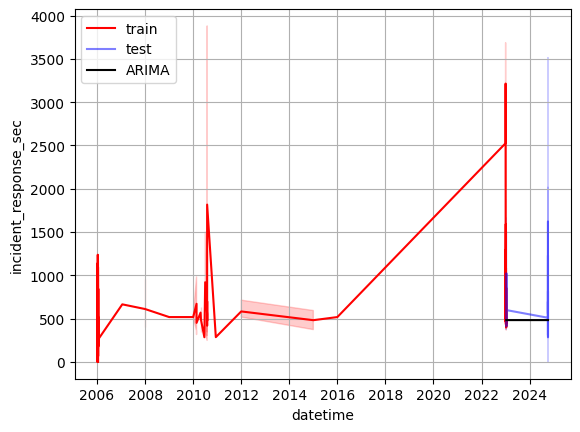

In [ ]:
sns.lineplot(data=train_df, x=train_df.index, y='incident_response_sec', label='train', color='red')
sns.lineplot(data=test_df,  x=test_df.index,  y='incident_response_sec', label='test',  color='blue',alpha=0.5)
sns.lineplot(x=test_df.index,y=arima_pred,color='black',label='ARIMA')
plt.grid()

In [237]:
baseline_y_shift = test_df.shift(1)

In [239]:
def model_evulation(actual_values,predict_values):
    print(f'root_mean_squared_error :{root_mean_squared_error(actual_values,predict_values)}')
    print(f'mean_squared_error :{mean_squared_error(actual_values,predict_values)}')
    print(f'mean_absolute_error :{mean_absolute_error(actual_values,predict_values)}')
    print(f'r2_score :{r2_score(actual_values,predict_values)}')

In [241]:
model_evulation(test_df,arima_pred)

root_mean_squared_error :642.6668433516277
mean_squared_error :413020.67154354556
mean_absolute_error :255.62396864420927
r2_score :-0.024111300809670277


In [242]:
baseline_y_shift=baseline_y_shift.fillna(baseline_y_shift.iloc[1])

In [243]:
model_evulation(test_df,baseline_y_shift)

root_mean_squared_error :887.1590761074511
mean_squared_error :787051.2263198262
mean_absolute_error :381.80793813115173
r2_score :-0.9515441011171331


In [244]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [245]:
ets_models = ExponentialSmoothing(
    endog = train_df,# tahmin etmek istediğin SERİ
    seasonal = 'add', # Bu seride tekrar eden bir desen var ve bu desen veriye ekleniyor.”
    seasonal_periods= 24 )

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [246]:
ets_results = ets_models.fit()

In [247]:
ets_predictions = ets_results.forecast(steps=len(test_df))

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='datetime', ylabel='incident_response_sec'>

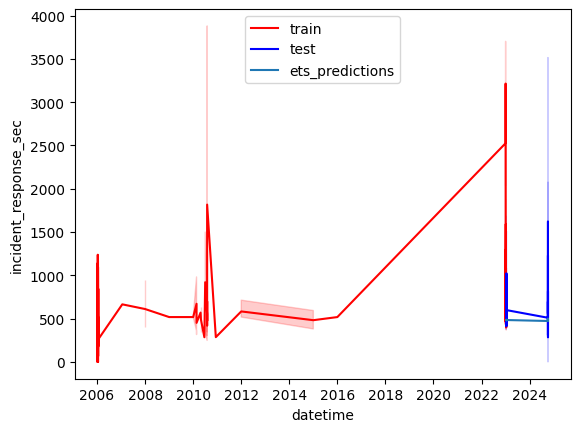

In [249]:
sns.lineplot(data=train_df, x=train_df.index, y='incident_response_sec', label='train', color='red')
sns.lineplot(data=test_df,  x=test_df.index,  y='incident_response_sec', label='test',  color='blue')
sns.lineplot( x=test_df.index,y=ets_predictions, label='ets_predictions')

In [250]:
model_evulation(test_df,ets_predictions)

root_mean_squared_error :642.8158758896428
mean_squared_error :413212.2502957687
mean_absolute_error :256.0389320828095
r2_score :-0.02458633263898169
